# DSCI 100 Group Project Final Report
## Introduction:
- provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report - **already done**
- clearly state the question you tried to answer with your project - **already done**
- identify and fully describe the dataset that was used to answer the question - **already done**

### Summary of Data Description
- TODO

## Methods & Results:
- describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
your report should include code which:
    - 1. loads data  - **already done**
    - 2. wrangles and cleans the data to the format necessary for the planned analysis - **already done**
    - 3. performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis - **already done**
    - 4. creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis - **already done**
    - **5. performs the data analysis**
    - **6. creates a visualization of the analysis** 
    - **note:** all figures should have a figure number and a legend

### **Introduction**

The Pacific Laboratory for Artificial Intelligence (PLAI) set up a MineCraft server where they observed player gameplay, creating a dataset consisting of two files: players.csv and sessions.csv.

Using this dataset, we want to explore which "kinds" of players are most likely to contribute a large amount of data. More specifically, we want to see if a **player's subscription status, age, gender, and experience can predict their playtime.**

In [1]:
# Load libraries needed
library(tidyverse)
library(repr)
library(tidymodels)

# Load dataset
players <- read_csv("https://raw.githubusercontent.com/nesteagle/DSCI100-Project/refs/heads/main/data/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/nesteagle/DSCI100-Project/refs/heads/main/data/sessions.csv")

# Rename columns for consistency
players <- players |>
    rename(age = Age, hashed_email = hashedEmail) |>
    drop_na()
sessions <- sessions |>
    rename(hashed_email = hashedEmail) |>
    drop_na()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
summary(players)
summary(sessions)

nrow(players)
nrow(sessions)
ncol(players)
ncol(sessions)

players |> distinct(experience, gender)

  experience        subscribe       hashed_email        played_hours    
 Length:194         Mode :logical   Length:194         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :142       Mode  :character   Median :  0.100  
                                                       Mean   :  5.905  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
     name              gender               age       
 Length:194         Length:194         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  

 hashed_email        start_time          end_time         original_start_time
 Length:1533        Length:1533        Length:1533        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  

[1] 194

[1] 1533

[1] 7

[1] 5

experience,gender
<chr>,<chr>
Pro,Male
Veteran,Male
Amateur,Female
Regular,Male
Regular,Female
Amateur,Male
Veteran,Female
Beginner,Female
Veteran,Non-binary


### **Data Description**

#### **players.csv**
- A list that contains the information of all the players. 
- Number of variables (columns): **7**
- Number of observations (rows): **196**

#### Player Variables
**experience:** 
- A categorical variable of type character: "Beginner", "Amateur", "Regular", "Veteran", "Pro".
- Refers to the player's surveyed/self-declared experience with Minecraft.
- Collected by survey.

**subscribe:** 
- A categorical variable of type logical (``true`` or ``false``)
- Refers to whether player is subscribed to a game-related newsletter or not.
- 144 TRUE and 52 FALSE
- Collected by survey.

**hashedEmail:** 
- A categorical variable of type character representing the player's hashed email.
- Presumably collected by signup.
  
**played_hours:** A quantitative variable of type double representing the amount of hours they played on the server, collected by playtime logs.
    - Summary statitistics:

| Min | Q1  | Median | Mean | Q3 | Max | NA's|
|-----|-----|--------|------|----|-----|-----|
| 0.00|0.00|0.10|5.85|0.60|223.10|0|

**name:** 
- A categorical variable of type character representing the player's name
- Collected by survey

**gender:** 
- A categorical variable of type character representing the player's self-identified gender:  "Male", "Female", "Non-binary", "Two-Spirited", "Agender", "Prefers not to say", "Other
- Collected by survey


**age:** 
- A quantitative variable of type double representing the player's age
- Collected by survey.
    - Summary statistics:

| Min | Q1  | Median | Mean | Q3 | Max | NA's|
|-----|-----|--------|------|----|-----|-----|
| 9.00|17.00|19.00|21.14|22.75|58.00|2|



#### **sessions.csv**
- A list of individual play sessions by each player
- Number of variables (columns): **5**
- Number of observations (rows): **1535**

#### Sessions Variables
**hashedEmail** 
- A categorical variable of type character
- Represents the session's players' email
- Presumably collected by signup.

**start_time** 
- A categorical/ordinal variable of type character
- Represents the player's session start time (dd/mm/yyy, 24 hour time)
- Collected by server logs

**end_time** 
- A categorical/ordinal variable of type character
- Represents the player's session end time (dd/mm/yyy, 24 hour time)
- Collected by server logs

**original_start_time:** 
- A quantitative variable of type double
- Represents the session's start time recorded in UNIX time (ms since Jan 1, 1970 at 00:00:00 UTC)
- Collected by server logs.
    - Summary statistics:

| Min | Q1  | Median | Mean | Q3 | Max | NA's|
|-----|-----|--------|------|----|-----|-----|
| 1.71e+12|1.72e+12|1.72e+12|1.72e+12|1.72e+12|1.73e+12|0|

**original_end_time:** 
- A quantitative variable of type double
- Represents the session's end time recorded in UNIX time (ms since Jan 1, 1970 at 00:00:00 UTC)
- Collected by server logs.
    - Summary statistics:

| Min | Q1  | Median | Mean | Q3 | Max | NA's|
|-----|-----|--------|------|----|-----|-----|
|1.71e+12|1.72e+12|1.72e+12|1.72e+12|1.72e+12|1.72e+12|2|


### **Potential Issues in Data**

- Low player count (196) might not be enough to generate meaningful conclusions
- A few NA variables in age and subscribe and original_end_time
- Summary statistics for original_start_time and original_end_time are not too specific as they are rounded to 2 decimal places.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


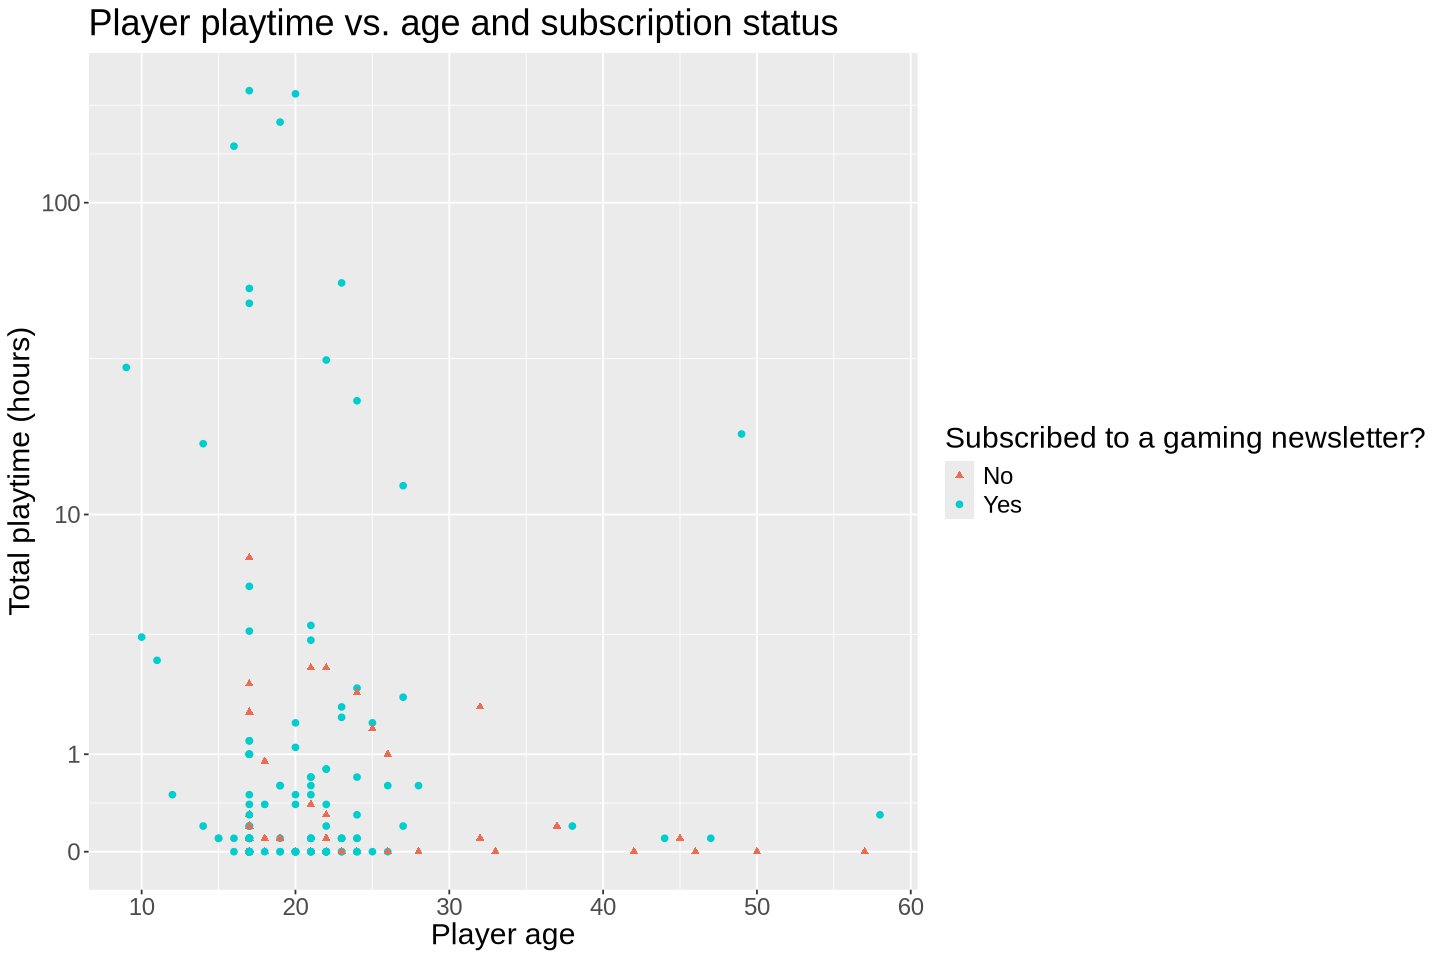

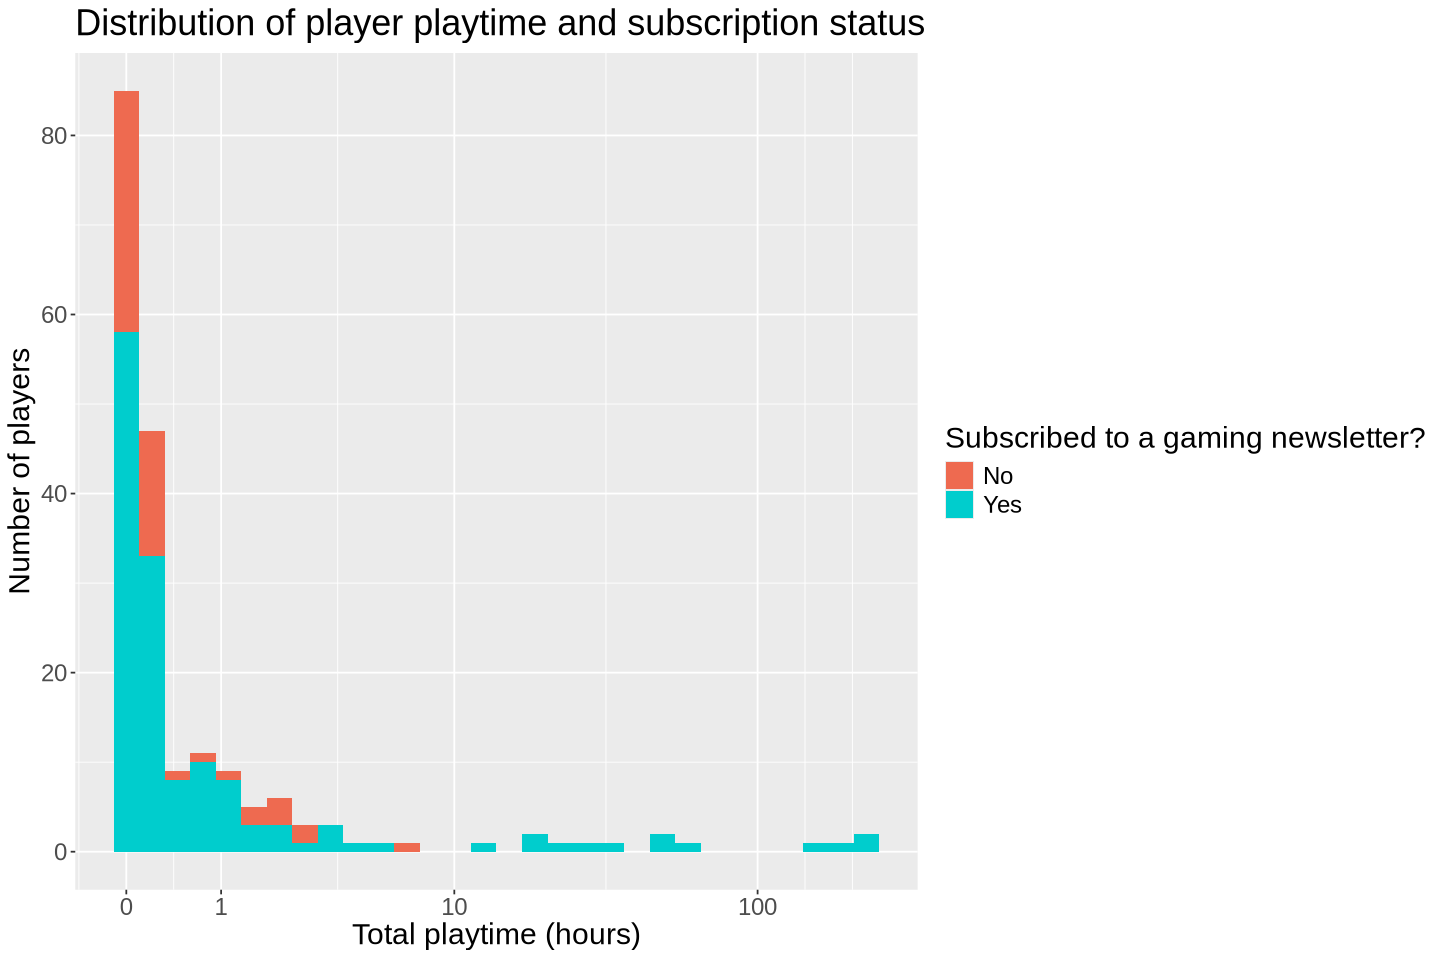

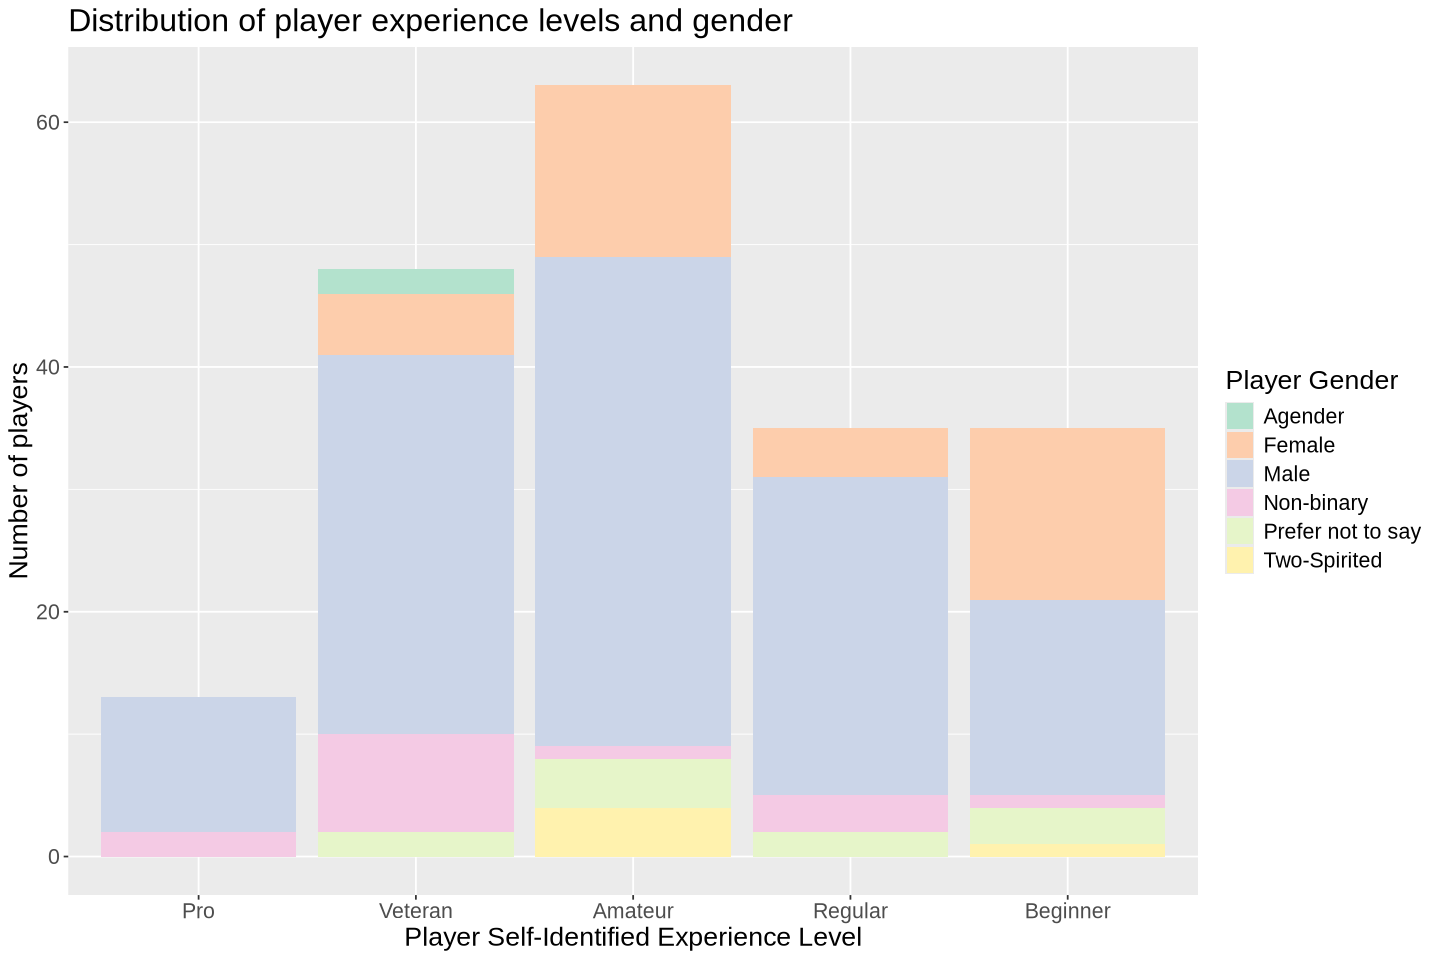

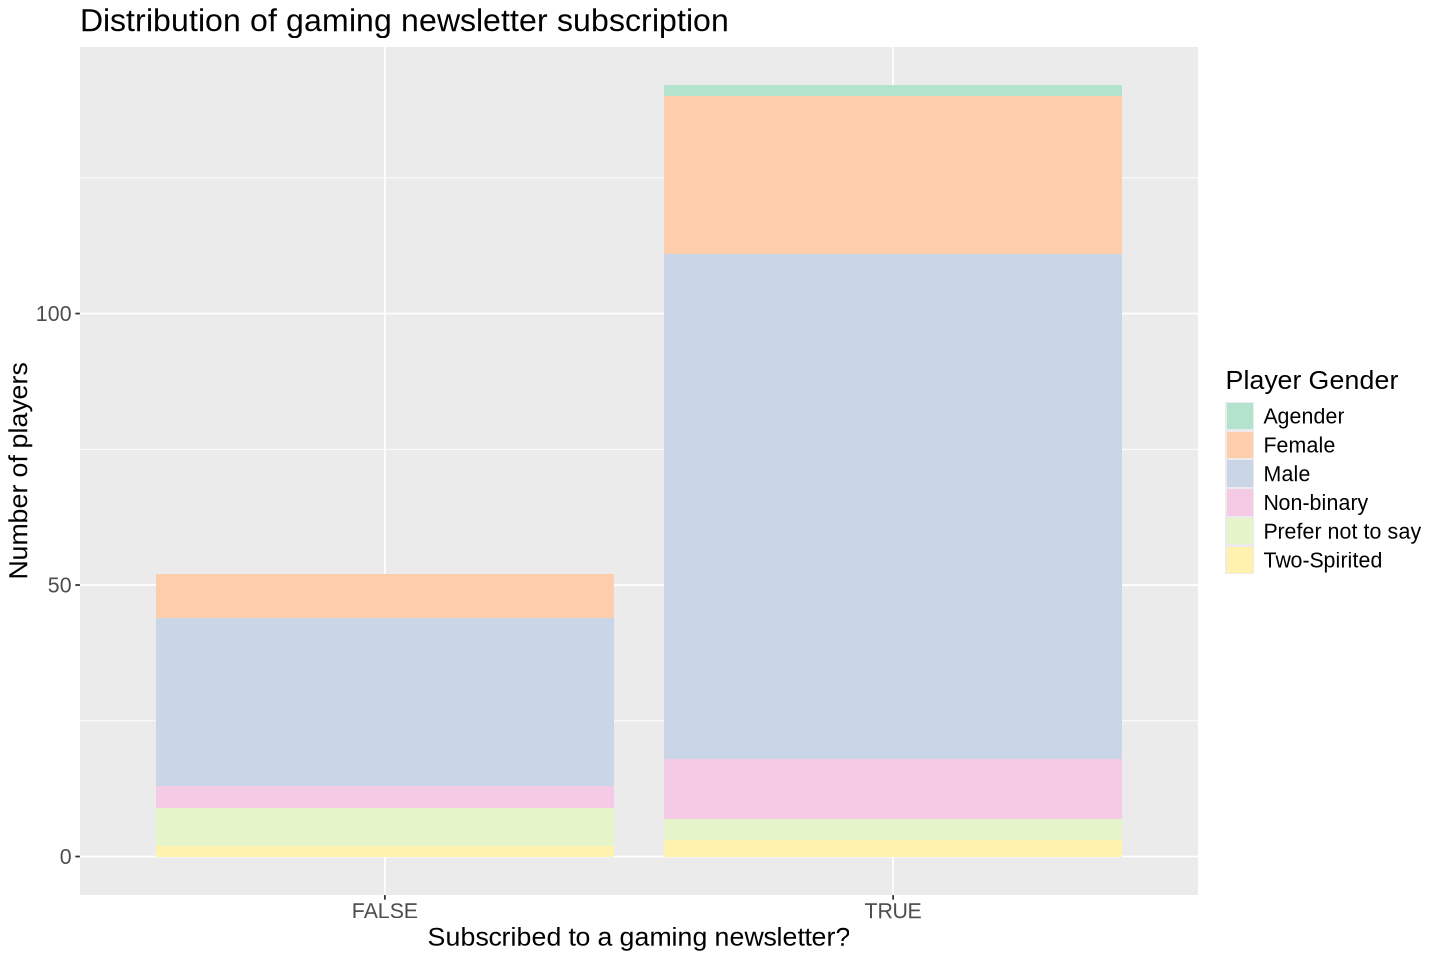

In [3]:
library(RColorBrewer)
options(repr.plot.width = 12, repr.plot.height = 8)

players_shifted <- players |> 
    mutate(played_hours = played_hours + 1)

ggplot(players_shifted, aes(x=age, y=played_hours, colour = subscribe, shape = subscribe)) +
    geom_point() +
    labs(x="Player age", y="Total playtime (hours)", colour = "Subscribed to a gaming newsletter?", shape = "Subscribed to a gaming newsletter?", title="Player playtime vs. age and subscription status")+
    scale_color_manual(labels=c("No","Yes"), values=c("coral2", "cyan3"))+
    scale_shape_manual(labels=c("No","Yes"), values=c("triangle", "circle"))+
    scale_y_log10(breaks=c(1,2,11,101), labels=c("0","1","10","100"))+
    theme(text = element_text(size=18))

ggplot(players_shifted, aes(x=played_hours, fill = subscribe)) +
    geom_histogram() +
    labs(x="Total playtime (hours)", y="Number of players", fill = "Subscribed to a gaming newsletter?", title="Distribution of player playtime and subscription status")+
    scale_fill_manual(labels=c("No","Yes"), values=c("coral2", "cyan3"))+
    theme(text = element_text(size=18))+
    scale_x_log10(breaks=c(1,2,11,101), labels=c("0","1","10","100"))

ggplot(players, aes(x=as_factor(experience), fill = gender)) +
    geom_bar(stat="count") +
    theme(text = element_text(size=16)) +
    labs(x="Player Self-Identified Experience Level", y="Number of players", title="Distribution of player experience levels and gender", fill = "Player Gender")+
    scale_fill_brewer(palette = 'Pastel2')

ggplot(players, aes(x=subscribe, fill=gender)) + 
    geom_bar(stat="count") +
    theme(text = element_text(size=16)) +
    labs(x="Subscribed to a gaming newsletter?", y="Number of players", title="Distribution of gaming newsletter subscription", fill = "Player Gender")+
    scale_fill_brewer(palette = 'Pastel2')

In [4]:
# TODO: MD cell to go above

set.seed(2026)

# split into testing, training sets
players_factor <- mutate(players, subscribe = as_factor(subscribe))
players_split <- initial_split(players_factor, prop = 0.7, strata = played_hours)
players_train <- training(players_split)
players_test <- testing(players_split)

# possibly revise EDA to include logtransformed regression
players_recipe <- recipe(played_hours ~ subscribe+age+gender+experience, data = players_train) |>
    step_scale(age) |>
    step_center(age)

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

players_vfold <- vfold_cv(players_train, v = 5, strata = played_hours)

players_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(players_train)

gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

players_results <- players_workflow |>
    tune_grid(resamples = players_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

players_results
rmse_min <- players_results |>
    slice_min(std_err, n=1)

rmse_min 

Warning message:
“tune samples were requested but there were 134 rows in the data. 129 will be used.”
→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 26 rows.
               ✖ Assigned data has 28 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 28 to size 26.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,30.09519,4,10.155379,Preprocessor1_Model01
2,rmse,standard,32.89797,4,9.316459,Preprocessor1_Model02
3,rmse,standard,33.37045,4,9.557044,Preprocessor1_Model03
4,rmse,standard,32.92537,4,9.763984,Preprocessor1_Model04
5,rmse,standard,32.17155,4,9.646203,Preprocessor1_Model05
6,rmse,standard,33.67421,4,8.186129,Preprocessor1_Model06
7,rmse,standard,33.43401,4,8.022885,Preprocessor1_Model07
8,rmse,standard,33.04435,4,8.309334,Preprocessor1_Model08
9,rmse,standard,32.82359,4,8.273174,Preprocessor1_Model09


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
19,rmse,standard,31.95368,4,7.764819,Preprocessor1_Model19


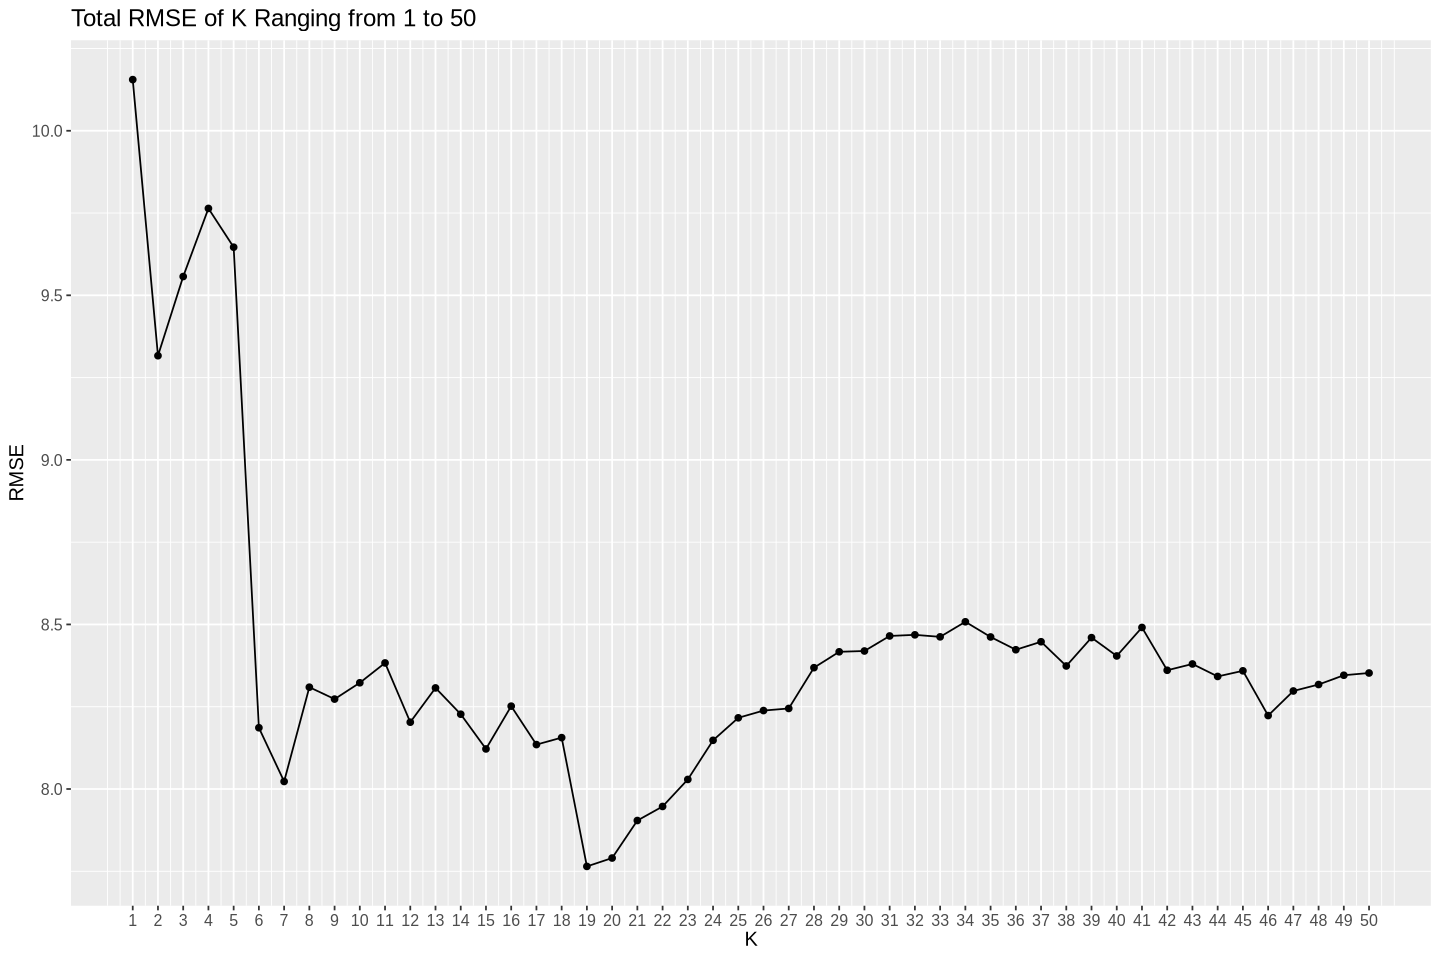

In [29]:
# rmse plot with k values

options(repr.plot.width = 12, repr.plot.height = 8)

rmse_plot <- players_results |>
    ggplot(aes(x = neighbors, y = std_err)) +
    geom_point() +
    geom_line () +
    labs(x = "K", y = "RMSE", title = "Total RMSE of K Ranging from 1 to 50") +
    scale_x_continuous(breaks = 1:50) +
    theme(text = element_text(size = 12))

rmse_plot

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,24.04881


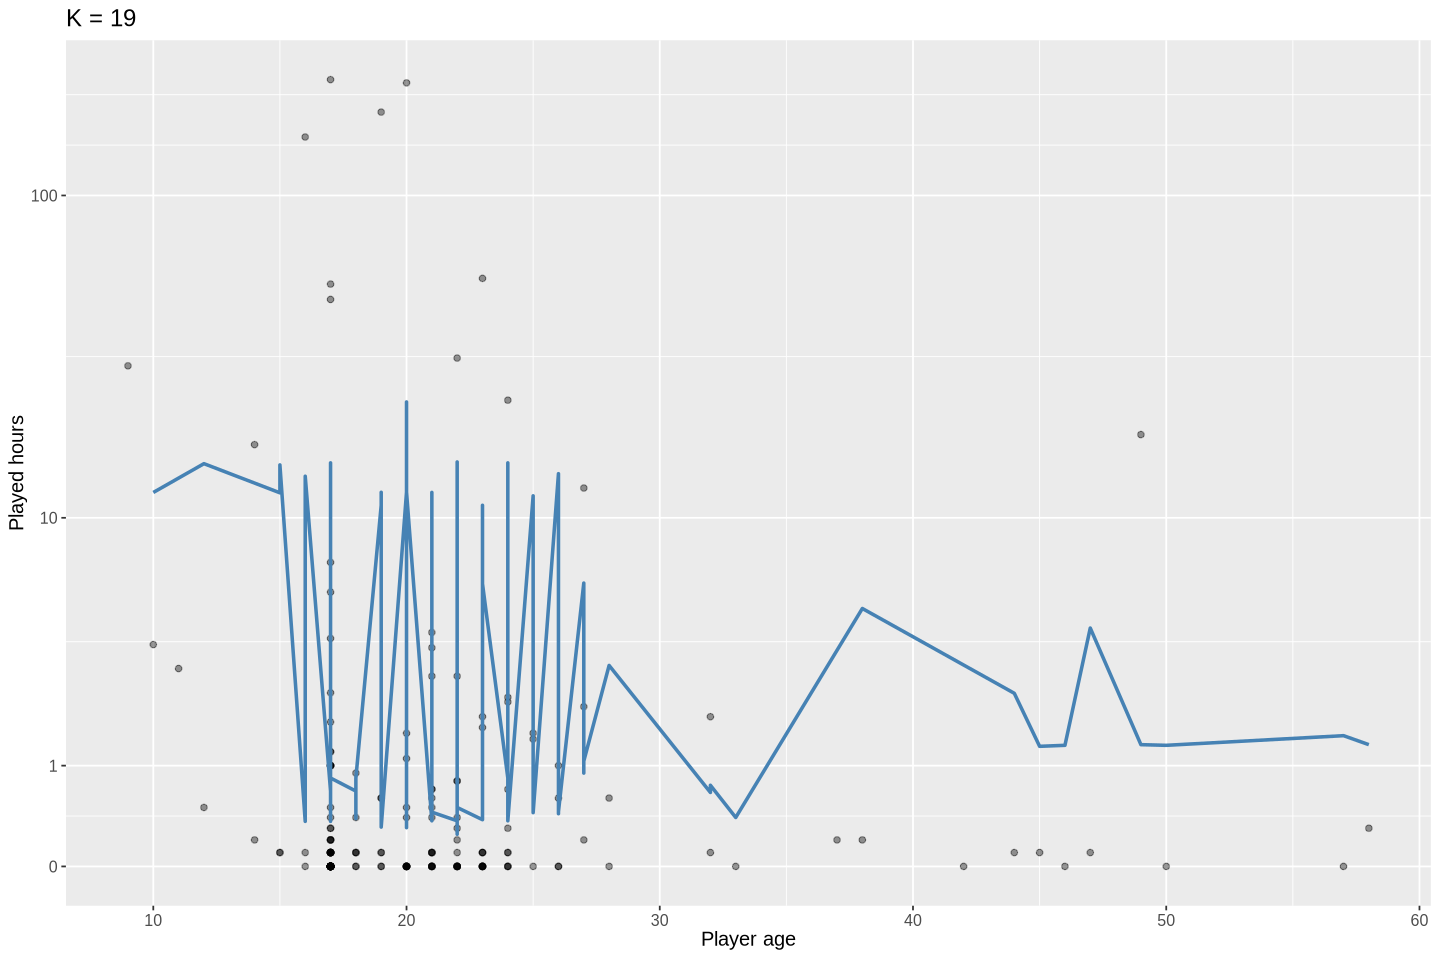

In [25]:
# TODO: MD above with documentation

set.seed(2026)

players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) |>
    set_engine("kknn") |>
    set_mode("regression")

players_best_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_best_spec) |>
    fit(players_train)

players_preds <- players_best_fit |>
    predict(players_train) |>
    bind_cols(players_train) |>
    mutate(.pred = .pred+1)

players_summary <- players_best_fit |>
    predict(players_test) |>
    bind_cols(players_test) |>
    metrics(truth = played_hours, estimate = .pred) |>
    filter(.metric=="rmse")

players_summary

plot_final <- ggplot(players_shifted, aes(x = age, y = played_hours)) +
    geom_point(alpha = 0.4) +
    geom_line(data = players_preds,
            mapping = aes(x = age, y = .pred),
            color = "steelblue",
            linewidth = 1) +
    xlab("Player age") +
    ylab("Played hours") +
    scale_y_log10(breaks=c(1,2,11,101), labels=c("0","1","10","100"))+
    ggtitle("K = 19") +
    theme(text = element_text(size = 12))
plot_final

## Discussion:
- summarize what you found
- discuss whether this is what you expected to find
- discuss what impact could such findings have
- discuss what future questions could this lead to
## References
references if necessary, make sure they all have a consistent citation style.